# **Project I - DNN**

**Shlomi Uziel & Nahama Bendavid**

In [1]:
from google.colab import drive
drive.mount("/content/gdrive",force_remount=True)

Mounted at /content/gdrive


Import cell

In [2]:
import os
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random as rd
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix , precision_score,recall_score
import seaborn as sns

Loading the data

In [3]:
dic_train = r'/content/gdrive/MyDrive/שנה ד/שנה ד סמסטר א/deep learning/mission 1/train'
dic_val = r'/content/gdrive/MyDrive/שנה ד/שנה ד סמסטר א/deep learning/mission 1/val'
dic_test = r'/content/gdrive/MyDrive/שנה ד/שנה ד סמסטר א/deep learning/mission 1/test'
categories = ['NORMAL','PNEUMONIA']

In [4]:
#load train data
train_data = []
train_labels = []

for x in categories:
  train_path = os.path.join(dic_train,x)

  for img in os.listdir(train_path):
    img_path = os.path.join(train_path,img)
    image = keras.utils.load_img(img_path,target_size=(224,224))
    image = keras.utils.img_to_array(image)
    image = keras.applications.resnet50.preprocess_input(image)
    train_data.append(image)
    train_labels.append(x)
    
train_data = np.array(train_data)
train_labels = np.array(train_labels)

In [5]:
#load val data
val_data = []
val_labels = []

for x in categories:
  val_path = os.path.join(dic_val,x)
  for img in os.listdir(val_path):
    img_path = os.path.join(val_path,img)
    image = keras.utils.load_img(img_path,target_size=(224,224))
    image = keras.utils.img_to_array(image)
    image = keras.applications.resnet50.preprocess_input(image)
    val_data.append(image)
    val_labels.append(x)
    
val_data = np.array(val_data)
val_labels = np.array(val_labels)

In [6]:
#load test data
test_data = []
test_labels = []

for x in categories:
  test_path = os.path.join(dic_test,x)
        
  for img in os.listdir(test_path):
    img_path = os.path.join(test_path,img)
    image = keras.utils.load_img(img_path,target_size=(224,224))
    image = keras.utils.img_to_array(image)
    image = keras.applications.resnet50.preprocess_input(image)
    test_data.append(image)
    test_labels.append(x) 

test_data = np.array(test_data)
test_labels = np.array(test_labels)

In [7]:
#check how many images in any set
print(len(train_labels))
print(len(val_labels))
print(len(test_labels))

5216
16
624


shuffle the data & labels

In [8]:
train_data, train_labels = shuffle(train_data, train_labels, random_state=1)
val_data, val_labels = shuffle(val_data, val_labels, random_state=1)
test_data, test_labels = shuffle(test_data, test_labels, random_state=1)

In [9]:
#checking the labels that realy shuffled
print(val_labels)

['NORMAL' 'PNEUMONIA' 'NORMAL' 'NORMAL' 'NORMAL' 'PNEUMONIA' 'NORMAL'
 'NORMAL' 'PNEUMONIA' 'NORMAL' 'PNEUMONIA' 'PNEUMONIA' 'PNEUMONIA'
 'PNEUMONIA' 'PNEUMONIA' 'NORMAL']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


PNEUMONIA


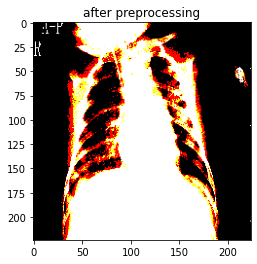

In [10]:
#plot some image to show how it looks like after the pre-processing
plt.imshow(val_data[1])
plt.title('after preprocessing')
print(val_labels[1])

scale and process the data & labels

In [11]:
# Scale images to the [0, 1] range

train_data = train_data.astype("float32") / 255
val_data = val_data.astype("float32") / 255
test_data = test_data.astype("float32") / 255

In [12]:
# convert class vectors to binary class matrices
num_classes = len(categories)

train_labels = [0 if i == 'NORMAL' else 1 for i in train_labels]
val_labels = [0 if i == 'NORMAL' else 1 for i in val_labels]
test_labels = [0 if i == 'NORMAL' else 1 for i in test_labels]
y_test = test_labels

train_labels = tf.keras.utils.to_categorical(train_labels, num_classes)
val_labels = tf.keras.utils.to_categorical(val_labels, num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes)

input_shape = train_data[1].shape

# Part I - Dense layers

model building

In [13]:
model = []
model = tf.keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Flatten(),  
        keras.layers.Dense(32, activation="relu",kernel_initializer = 'he_uniform'),
        keras.layers.Dropout(0.1),    
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 32)                4816928   
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 4,816,994
Trainable params: 4,816,994
Non-trainable params: 0
_________________________________________________________________


In [14]:
batch_size = 16
epochs = 30
lr = 0.0000001
adam = keras.optimizers.Adam(learning_rate=lr, beta_1=0.9, beta_2=0.95)

model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=["accuracy"])

fitting the model

In [15]:
his = model.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/30
294/294 [==============================] - 5s 13ms/step - loss: 0.5586 - accuracy: 0.7416 - val_loss: 0.5007 - val_accuracy: 0.7433
Epoch 2/30
294/294 [==============================] - 4s 12ms/step - loss: 0.4664 - accuracy: 0.7752 - val_loss: 0.4216 - val_accuracy: 0.8180
Epoch 3/30
294/294 [==============================] - 4s 13ms/step - loss: 0.4014 - accuracy: 0.8340 - val_loss: 0.3657 - val_accuracy: 0.8582
Epoch 4/30
294/294 [==============================] - 4s 13ms/step - loss: 0.3535 - accuracy: 0.8711 - val_loss: 0.3249 - val_accuracy: 0.8716
Epoch 5/30
294/294 [==============================] - 4s 13ms/step - loss: 0.3160 - accuracy: 0.8969 - val_loss: 0.2930 - val_accuracy: 0.8985
Epoch 6/30
294/294 [==============================] - 4s 12ms/step - loss: 0.2867 - accuracy: 0.9107 - val_loss: 0.2698 - val_accuracy: 0.9061
Epoch 7/30
294/294 [==============================] - 4s 13ms/step - loss: 0.2658 - accuracy: 0.9148 - val_loss: 0.2507 - val_accuracy: 0.9119

loss & accuracy plotting

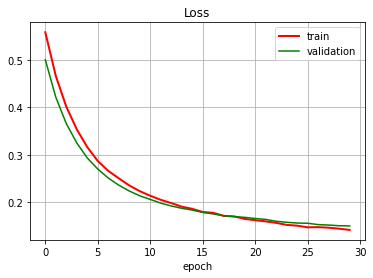

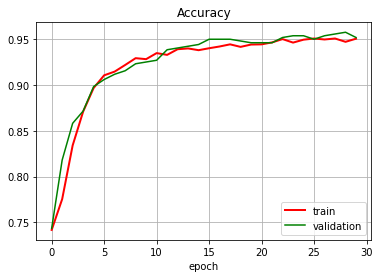

In [16]:
xx = np.arange(epochs)
train_loss = his.history.get('loss')
val_loss = his.history.get('val_loss')
train_accuracy = his.history.get('accuracy')
val_accuracy = his.history.get('val_accuracy')

plt.plot(xx,train_loss,'-r',linewidth=2)
plt.plot(xx,val_loss,'-g')
plt.title('Loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.xlabel('epoch')
plt.grid()
plt.show()

plt.plot(xx,train_accuracy,'-r',linewidth=2)
plt.plot(xx,val_accuracy,'-g')
plt.title('Accuracy')
plt.legend(['train', 'validation'], loc='lower right')
plt.xlabel('epoch')
plt.grid()
plt.show()

testing the model on test set

In [17]:
loss,score = model.evaluate(test_data, test_labels)
print("Test loss:", loss)
print("Test accuracy:", score)

20/20 [==============================] - 0s 12ms/step - loss: 0.5511 - accuracy: 0.7660
Test loss: 0.5511425137519836
Test accuracy: 0.7660256624221802


Confusion matrix & recall/precision

Precision:  0.7319391634980988
Recall:  0.9871794871794872


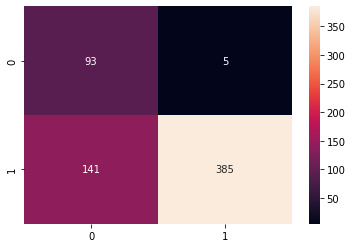

In [18]:
y_pred=np.argmax(model.predict(test_data), axis=-1)# for softmax
y_true=np.argmax(test_labels,axis=1)

precision = precision_score(y_true,y_pred)
recall = recall_score(y_true,y_pred)

print('Precision: ',precision)
print('Recall: ',recall)

cm = confusion_matrix(y_pred,y_true)
f = sns.heatmap(cm, annot=True, fmt='d')

# Part II - Conv layers

model building

In [13]:
model = []
model = tf.keras.Sequential(
    [
        keras.Input(shape=input_shape),     
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu",kernel_initializer = 'he_uniform'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu",kernel_initializer = 'he_uniform'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu",kernel_initializer = 'he_uniform'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.BatchNormalization(),       
        keras.layers.Flatten(),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 111, 111, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                        

In [14]:
batch_size = 16
epochs = 50
lr = 0.0000001
adam = keras.optimizers.Adam(learning_rate=lr, beta_1=0.9, beta_2=0.95)

model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=["accuracy"])

fitting the model

In [15]:
his = model.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/50
294/294 [==============================] - 24s 56ms/step - loss: 0.9231 - accuracy: 0.5695 - val_loss: 0.8429 - val_accuracy: 0.4713
Epoch 2/50
294/294 [==============================] - 15s 52ms/step - loss: 0.7839 - accuracy: 0.6291 - val_loss: 0.6659 - val_accuracy: 0.6686
Epoch 3/50
294/294 [==============================] - 15s 53ms/step - loss: 0.6992 - accuracy: 0.6730 - val_loss: 0.6416 - val_accuracy: 0.7031
Epoch 4/50
294/294 [==============================] - 15s 52ms/step - loss: 0.6329 - accuracy: 0.7109 - val_loss: 0.5890 - val_accuracy: 0.7318
Epoch 5/50
294/294 [==============================] - 15s 52ms/step - loss: 0.5813 - accuracy: 0.7397 - val_loss: 0.5427 - val_accuracy: 0.7682
Epoch 6/50
294/294 [==============================] - 15s 52ms/step - loss: 0.5385 - accuracy: 0.7601 - val_loss: 0.5034 - val_accuracy: 0.7720
Epoch 7/50
294/294 [==============================] - 15s 52ms/step - loss: 0.4954 - accuracy: 0.7780 - val_loss: 0.4697 - val_accuracy:

loss & accuracy plotting

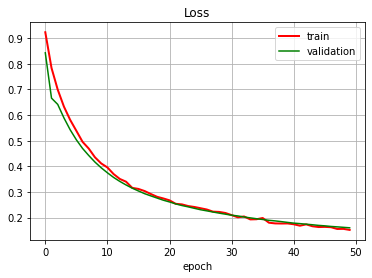

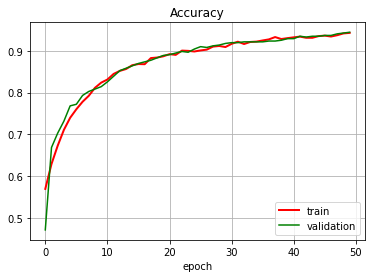

In [16]:
xx = np.arange(epochs)
train_loss = his.history.get('loss')
val_loss = his.history.get('val_loss')
train_accuracy = his.history.get('accuracy')
val_accuracy = his.history.get('val_accuracy')

plt.plot(xx,train_loss,'-r',linewidth=2)
plt.plot(xx,val_loss,'-g')
plt.title('Loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.xlabel('epoch')
plt.grid()
plt.show()

plt.plot(xx,train_accuracy,'-r',linewidth=2)
plt.plot(xx,val_accuracy,'-g')
plt.title('Accuracy')
plt.legend(['train', 'validation'], loc='lower right')
plt.xlabel('epoch')
plt.grid()
plt.show()

testing the model on test set

In [17]:
loss,score = model.evaluate(test_data, test_labels)
print("Test loss:", loss)
print("Test accuracy:", score)

20/20 [==============================] - 1s 34ms/step - loss: 0.5106 - accuracy: 0.7965
Test loss: 0.5106320977210999
Test accuracy: 0.7964743375778198


Confusion matrix & recall/precision

Precision:  0.7573385518590998
Recall:  0.9923076923076923


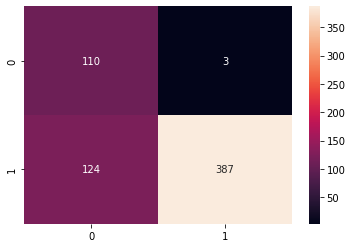

In [18]:
y_pred=np.argmax(model.predict(test_data), axis=-1)# for softmax
y_true=np.argmax(test_labels,axis=1)

precision = precision_score(y_true,y_pred)
recall = recall_score(y_true,y_pred)

print('Precision: ',precision)
print('Recall: ',recall)

cm = confusion_matrix(y_pred,y_true)
f = sns.heatmap(cm, annot=True, fmt='d')

# Part III - Learnging rate effect

In [13]:
from tensorboard.plugins.hparams import api as hp

%load_ext tensorboard
HP_learning_rate = hp.HParam('learning rate',hp.Discrete([0.1,0.001,0.00001]))

In [14]:
def train_model(hparams,logdir,x_train, y_train):
  model = tf.keras.Sequential([
        keras.Input(shape=input_shape),     
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu",kernel_initializer = 'he_uniform'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu",kernel_initializer = 'he_uniform'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu",kernel_initializer = 'he_uniform'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.BatchNormalization(),       
        keras.layers.Flatten(),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(num_classes, activation="softmax"),
    ])

  adam = keras.optimizers.Adam(learning_rate=hparams[HP_learning_rate], beta_1=0.9, beta_2=0.95)

  model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=["accuracy"])

  hist = model.fit(x_train, y_train, epochs=5,batch_size=32,validation_split=0.1,callbacks=[tf.keras.callbacks.TensorBoard(logdir),hp.KerasCallback(logdir, hparams)])  
  
  return hist

In [15]:
session_num = 0
for lr in HP_learning_rate.domain.values:
      hparams = {
        HP_learning_rate: lr,
      }
      run_name = "run-%d" % session_num
      logdir = 'logs/hparam_tuning/' + run_name
      print('--- Starting trial: %s' % run_name)
      print({h.name: hparams[h] for h in hparams})
      hist = train_model(hparams,logdir,train_data, train_labels)
      session_num += 1

--- Starting trial: run-0
{'learning rate': 1e-05}
Epoch 1/5
147/147 [==============================] - 21s 108ms/step - loss: 0.2578 - accuracy: 0.8943 - val_loss: 0.6813 - val_accuracy: 0.7414
Epoch 2/5
147/147 [==============================] - 14s 96ms/step - loss: 0.1055 - accuracy: 0.9612 - val_loss: 0.3960 - val_accuracy: 0.8046
Epoch 3/5
147/147 [==============================] - 14s 95ms/step - loss: 0.0767 - accuracy: 0.9695 - val_loss: 0.0999 - val_accuracy: 0.9559
Epoch 4/5
147/147 [==============================] - 14s 95ms/step - loss: 0.0639 - accuracy: 0.9776 - val_loss: 0.0687 - val_accuracy: 0.9713
Epoch 5/5
147/147 [==============================] - 14s 96ms/step - loss: 0.0494 - accuracy: 0.9834 - val_loss: 0.0644 - val_accuracy: 0.9751
--- Starting trial: run-1
{'learning rate': 0.001}
Epoch 1/5
147/147 [==============================] - 17s 107ms/step - loss: 0.4849 - accuracy: 0.9491 - val_loss: 2.7928 - val_accuracy: 0.7490
Epoch 2/5
147/147 [===================

In [17]:
%tensorboard --logdir logs/hparam_tuning

Reusing TensorBoard on port 6006 (pid 9094), started 2:19:12 ago. (Use '!kill 9094' to kill it.)

<IPython.core.display.Javascript object>